# Лабораторна робота №16

## Спроба вирішити задачу регресії за допомогою методу найменших квадратів і квадратичної цільової функції

Для знаходження значень коефіцієнтів регресії з однією ознакою та для квадратичної функції необхідно вирішити систему рівнянь: 

$
 \begin{cases}
   \theta_0l + \theta_1\sum\limits_{i = 1}^{l} x_i + \theta_2\sum\limits_{i = 1}^{l} x^2_i = \sum\limits_{i = 1}^{l} y_i\\
   \theta_0\sum\limits_{i = 1}^{l} x_i + \theta_1\sum\limits_{i = 1}^{l} x^2_i + \theta_2\sum\limits_{i = 1}^{l} x^3_i = \sum\limits_{i = 1}^{l} x_iy_i\\
   \theta_0\sum\limits_{i = 1}^{l} x^2_i + \theta_1\sum\limits_{i = 1}^{l} x^3_i + \theta_2\sum\limits_{i = 1}^{l} x^4_i = \sum\limits_{i = 1}^{l} x^2_iy_i\\
 \end{cases}
$

Вирішимо цю систему за допомогою бібліотеки Sympy

In [398]:
import sympy as sp

# Визначаємо символьні змінні
t0, t1, t2, l, sum_x, sum_x2, sum_y, sum_x3, sum_xy, sum_x4, sum_x2y = sp.symbols('t0, t1, t2, l, sum_x, sum_x2, sum_y, sum_x3, sum_xy, sum_x4, sum_x2y')

eq1 = sp.Eq(t0*l + t1*sum_x + t2*sum_x2, sum_y)
eq2 = sp.Eq(t0*sum_x + t1*sum_x2 + t2*sum_x3, sum_xy)
eq3 = sp.Eq(t0*sum_x2 + t1*sum_x3 + t2*sum_x4, sum_x2y)

# Знаходимо символічний розв'язок рівнянь (без підстановки відомих значень)
sol = sp.solve([eq1, eq2, eq3], [t0, t1, t2])

In [399]:
# замінюємо вигляд змінних на їхні математичні еквіваленти з формул
symbol_names = {
    t0: '\\theta_0', t1: '\\theta_1', t2: '\\theta_2', 
    sum_x: '\sum\limits_{i = 1}^{l} x^2_iy_i',
    sum_x2: '\sum\limits_{i = 1}^{l} x^2_i',
    sum_x3: '\sum\limits_{i = 1}^{l} x^3_i',
    sum_x4: '\sum\limits_{i = 1}^{l} x^4_i',
    sum_y: '\sum\limits_{i = 1}^{l} y_i',
    sum_xy: '\sum\limits_{i = 1}^{l} x_iy_i',
    sum_x2y: '\sum\limits_{i = 1}^{l} x^2_iy_i'
}
# виводимо результати відформатовані в latex
latex_sol = sp.latex(sol, symbol_names=symbol_names, mode='inline')
print(latex_sol)

$\left\{ \theta_0 : \frac{\sum\limits_{i = 1}^{l} x^2_iy_i \sum\limits_{i = 1}^{l} x^2_iy_i \sum\limits_{i = 1}^{l} x^3_i - \sum\limits_{i = 1}^{l} x^2_iy_i \sum\limits_{i = 1}^{l} x^4_i \sum\limits_{i = 1}^{l} x_iy_i - \left(\sum\limits_{i = 1}^{l} x^2_i\right)^{2} \sum\limits_{i = 1}^{l} x^2_iy_i + \sum\limits_{i = 1}^{l} x^2_i \sum\limits_{i = 1}^{l} x^3_i \sum\limits_{i = 1}^{l} x_iy_i + \sum\limits_{i = 1}^{l} x^2_i \sum\limits_{i = 1}^{l} x^4_i \sum\limits_{i = 1}^{l} y_i - \left(\sum\limits_{i = 1}^{l} x^3_i\right)^{2} \sum\limits_{i = 1}^{l} y_i}{l \sum\limits_{i = 1}^{l} x^2_i \sum\limits_{i = 1}^{l} x^4_i - l \left(\sum\limits_{i = 1}^{l} x^3_i\right)^{2} - \left(\sum\limits_{i = 1}^{l} x^2_iy_i\right)^{2} \sum\limits_{i = 1}^{l} x^4_i + 2 \sum\limits_{i = 1}^{l} x^2_iy_i \sum\limits_{i = 1}^{l} x^2_i \sum\limits_{i = 1}^{l} x^3_i - \left(\sum\limits_{i = 1}^{l} x^2_i\right)^{3}}, \  \theta_1 : \frac{- l \sum\limits_{i = 1}^{l} x^2_iy_i \sum\limits_{i = 1}^{l} x^3_i + l \sum\

Розвʼязками системи будуть:

$\theta_0 : \frac{\sum\limits_{i = 1}^{l} x^2_iy_i \sum\limits_{i = 1}^{l} x^2_iy_i \sum\limits_{i = 1}^{l} x^3_i - \sum\limits_{i = 1}^{l} x^2_iy_i \sum\limits_{i = 1}^{l} x^4_i \sum\limits_{i = 1}^{l} x_iy_i - \left(\sum\limits_{i = 1}^{l} x^2_i\right)^{2} \sum\limits_{i = 1}^{l} x^2_iy_i + \sum\limits_{i = 1}^{l} x^2_i \sum\limits_{i = 1}^{l} x^3_i \sum\limits_{i = 1}^{l} x_iy_i + \sum\limits_{i = 1}^{l} x^2_i \sum\limits_{i = 1}^{l} x^4_i \sum\limits_{i = 1}^{l} y_i - \left(\sum\limits_{i = 1}^{l} x^3_i\right)^{2} \sum\limits_{i = 1}^{l} y_i}{l \sum\limits_{i = 1}^{l} x^2_i \sum\limits_{i = 1}^{l} x^4_i - l \left(\sum\limits_{i = 1}^{l} x^3_i\right)^{2} - \left(\sum\limits_{i = 1}^{l} x^2_iy_i\right)^{2} \sum\limits_{i = 1}^{l} x^4_i + 2 \sum\limits_{i = 1}^{l} x^2_iy_i \sum\limits_{i = 1}^{l} x^2_i \sum\limits_{i = 1}^{l} x^3_i - \left(\sum\limits_{i = 1}^{l} x^2_i\right)^{3}}$

$\theta_1 : \frac{- l \sum\limits_{i = 1}^{l} x^2_iy_i \sum\limits_{i = 1}^{l} x^3_i + l \sum\limits_{i = 1}^{l} x^4_i \sum\limits_{i = 1}^{l} x_iy_i + \sum\limits_{i = 1}^{l} x^2_iy_i \sum\limits_{i = 1}^{l} x^2_i \sum\limits_{i = 1}^{l} x^2_iy_i - \sum\limits_{i = 1}^{l} x^2_iy_i \sum\limits_{i = 1}^{l} x^4_i \sum\limits_{i = 1}^{l} y_i - \left(\sum\limits_{i = 1}^{l} x^2_i\right)^{2} \sum\limits_{i = 1}^{l} x_iy_i + \sum\limits_{i = 1}^{l} x^2_i \sum\limits_{i = 1}^{l} x^3_i \sum\limits_{i = 1}^{l} y_i}{l \sum\limits_{i = 1}^{l} x^2_i \sum\limits_{i = 1}^{l} x^4_i - l \left(\sum\limits_{i = 1}^{l} x^3_i\right)^{2} - \left(\sum\limits_{i = 1}^{l} x^2_iy_i\right)^{2} \sum\limits_{i = 1}^{l} x^4_i + 2 \sum\limits_{i = 1}^{l} x^2_iy_i \sum\limits_{i = 1}^{l} x^2_i \sum\limits_{i = 1}^{l} x^3_i - \left(\sum\limits_{i = 1}^{l} x^2_i\right)^{3}}$

$\theta_2 : \frac{l \sum\limits_{i = 1}^{l} x^2_i \sum\limits_{i = 1}^{l} x^2_iy_i - l \sum\limits_{i = 1}^{l} x^3_i \sum\limits_{i = 1}^{l} x_iy_i - \left(\sum\limits_{i = 1}^{l} x^2_iy_i\right)^{2} \sum\limits_{i = 1}^{l} x^2_iy_i + \sum\limits_{i = 1}^{l} x^2_iy_i \sum\limits_{i = 1}^{l} x^2_i \sum\limits_{i = 1}^{l} x_iy_i + \sum\limits_{i = 1}^{l} x^2_iy_i \sum\limits_{i = 1}^{l} x^3_i \sum\limits_{i = 1}^{l} y_i - \left(\sum\limits_{i = 1}^{l} x^2_i\right)^{2} \sum\limits_{i = 1}^{l} y_i}{l \sum\limits_{i = 1}^{l} x^2_i \sum\limits_{i = 1}^{l} x^4_i - l \left(\sum\limits_{i = 1}^{l} x^3_i\right)^{2} - \left(\sum\limits_{i = 1}^{l} x^2_iy_i\right)^{2} \sum\limits_{i = 1}^{l} x^4_i + 2 \sum\limits_{i = 1}^{l} x^2_iy_i \sum\limits_{i = 1}^{l} x^2_i \sum\limits_{i = 1}^{l} x^3_i - \left(\sum\limits_{i = 1}^{l} x^2_i\right)^{3}}$



Тоді алгоритм набуває вигляду:

$a(x)=\theta_0 + \theta_1x + \theta_2x^2$

Завантажимо дані

In [400]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

%matplotlib inline

In [401]:
def load_data(input_file, delimiter = ','):
    data = np.loadtxt(input_file, delimiter=delimiter)
    X, y = data[:, :-1], data[:, -1]
    return X, y

In [402]:
X, y = load_data('../data/data_singlevar_regr.txt')
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=5)

Підставимо значення в отриманне рівняння щоб отримати $\theta_0$, $\theta_1$ та $\theta_2$: 

In [418]:
x = x_train[:, 0]
y = y_train

vals = {
    l:  x.shape[0],
    sum_x: np.sum(x), 
    sum_x2: np.sum(x*x),
    sum_x3: np.sum(x*x*x),
    sum_x4: np.sum(x*x*x*x),
    sum_y: np.sum(y),
    sum_xy: np.sum(x*y),
    sum_x2y: np.sum(x*x*y)
}

theta_0 = sol.get(t0).subs(vals)
theta_1 = sol.get(t1).subs(vals)
theta_2 = sol.get(t2).subs(vals)



In [404]:
print('theta_0: ', theta_0)
print('theta_1: ', theta_1)
print('theta_2: ', theta_2)

theta_0:  4.19965616019174
theta_1:  0.674394815198735
theta_2:  -0.0113573660207802


Прогноз отриманий на тренувальних даних `y_predicted`

In [424]:
m = x_train.shape[0]
y_predicted = np.zeros(m)

for i in range(m):
    y_predicted[i] = theta_0 + theta_1 * x_train[i]  + theta_1 * x_train[i] * x_train[i]

print("Метрики якості на тренувальному наборі:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_train, y_predicted), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_train, y_predicted), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_train, y_predicted), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_train, y_predicted), 2))
print("R2 score =", round(sm.r2_score(y_train, y_predicted), 2))

Метрики якості на тренувальному наборі:
Mean absolute error = 6.68
Mean squared error = 121.78
Median absolute error = 2.58
Explain variance score = -14.54
R2 score = -23.08


Прогноз отриманий на  даних для перевірки `y_test_predicted`

In [423]:
n = x_test.shape[0]
y_test_predicted = np.zeros(n)
for i in range(n):
    y_test_predicted[i] =  theta_0 + theta_1 * x_test[i]  + theta_1 * x_test[i] * x_test[i]

print("Метрики якості на наборі для перевірки:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_predicted), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_predicted), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_predicted), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_predicted), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_predicted), 2))

Метрики якості на наборі для перевірки:
Mean absolute error = 5.27
Mean squared error = 61.85
Median absolute error = 2.54
Explain variance score = -10.1
R2 score = -18.99


### Візуалізація отриманих результатів

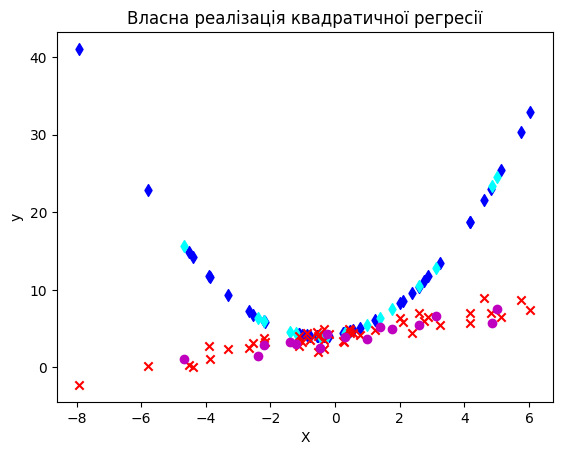

In [409]:
plt.scatter(x_train, y_predicted, c = "b", marker='d')
plt.scatter(x_test, y_test_predicted, c = "cyan", marker='d')

plt.scatter(x_train, y_train, marker='x', c='r') 
plt.scatter(x_test, y_test, color='m')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Власна реалізація квадратичної регресії')

plt.show()

❌ Загальний результат незадовільний. 

Вершина параболи перебуває там де є найбільше скупчення точок тренувального набору.  
Можливо завдяки тому що більшість передбачень сконцентровані біля вершини параболи, тому загальний рівень відхилень мінімальний.  
Але значення біля країв графіку значно відрізняються.

Можливо було покращити результат і спробувати нахилити параболу відносно вісі Y, для цього потрібно застосувати формули повороту вісі координат

$$
\bar{x} = x cos(\alpha) - y sin(\alpha)\\
\bar{y} = x sin(\alpha) - y cos(\alpha)\\
$$

Але це значно ускладнить знаходження розвʼязків аналітичним шляхом